In [22]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import cartopy.feature as cfeature
import cartopy.mpl.gridliner as gridliner
from scipy.ndimage import gaussian_filter
import geopandas as gpd
import warnings
import matplotlib.colors as mcolors
from matplotlib.cm import ScalarMappable
import matplotlib.patches as mpatches
import matplotlib.ticker as mticker 
import pandas as pd

warnings.filterwarnings("ignore")


In [23]:
# Load the watershed shapefile and filter for Lake Suprise
shapefile_path = '/Users/alexaterrazas/Downloads/ne_10m_lakes_pluvial (1)/ne_10m_lakes_pluvial.shp'
gdf = gpd.read_file(shapefile_path)
target_watershed_name = 'Surprise'
target_watershed = gdf[gdf['name'] == target_watershed_name]
target_watershed

,scalerank,featurecla,name,timescale,note,min_zoom,geometry
122,5,Pluvial lake,Surprise,Late Quaternary,None,4.7,"POLYGON ((-119.99310 41.33012, -119.99478 41.3..."


In [24]:
# proxy_tas_LGM = 5.243508654666668
# proxy_maat_std =  2.9410124058940097

    
# obs_tas_modern = 9.2 #deg C annual T
# modern_maat_std = 1

# diff_proxy = proxy_tas_LGM - obs_tas_modern

# diff_obs_error = np.sqrt((proxy_maat_std**2 + modern_maat_std**2)/4)
# diff_obs_error


# proxy_upper = diff_proxy + diff_obs_error
# proxy_lower = diff_proxy - diff_obs_error
# print(diff_proxy, proxy_upper, proxy_lower )

# HS_proxy_tas_LGM = 5.059189599999997
# HS_proxy_maat_std = 1.89

# diff_hs = HS_proxy_tas_LGM - obs_tas_modern
# diff_hs_obs_error = np.sqrt((HS_proxy_maat_std**2 + modern_maat_std**2)/4)
# diff_hs_obs_error

In [25]:
# print(diff_proxy , diff_hs)
# print(diff_obs_error, diff_hs_obs_error)

In [26]:
def annual_anom_pmip3(filename_lgm, filename_pi, variable):
    # Load datasets
    ds_lgm = xr.open_dataset(filename_lgm)
    ds_pi = xr.open_dataset(filename_pi)

  
    upper_lat = 45
    lower_lat = 37
    left_lon = -124  # Adjusted from 242
    right_lon = -116  # Adjusted from 255


    # Select the data within the specified latitude and longitude range
    ds_lgm_selected = ds_lgm.sel(lat=slice(lower_lat, upper_lat), lon=slice(left_lon, right_lon))
    ds_pi_selected = ds_pi.sel(lat=slice(lower_lat, upper_lat), lon=slice(left_lon, right_lon))

    # Extract variable and compute annual average
    variable_lgm = ds_lgm_selected[variable].mean('month')
    variable_pi = ds_pi_selected[variable].mean('month')

    # Compute the difference
    difference = variable_lgm - variable_pi

    # Calculate percent change anomaly
    percent_change_anomaly = (difference / variable_pi) * 100

    return difference



datasets_lgm_pmip3 = [
                'regridded_tas_Aclim_CCSM4_lgm_r2i1p1_187001-190012-clim.nc',
                'regridded_tas_Aclim_CNRM-CM5_lgm_r1i1p1_180001-199912-clim.nc',
                'regridded_tas_Aclim_COSMOS-ASO_lgm_r1i1p1_100001-159912-clim.nc',
                'regridded_tas_Aclim_FGOALS-g2_lgm_r1i1p1_055001-064912-clim.nc',
                'regridded_tas_Aclim_GISS-E2-R_lgm_r1i1p150_300001-309912-clim.nc',
                'regridded_tas_Aclim_IPSL-CM5A-LR_lgm_r1i1p1_260101-280012-clim.nc',
                'regridded_tas_Aclim_MIROC-ESM_lgm_r1i1p1_460001-469912-clim.nc',
                'regridded_tas_Aclim_MPI-ESM-P_lgm_r1i1p1_185001-194912-clim.nc',
                'regridded_tas_Aclim_MRI-CGCM3_lgm_r1i1p1_250101-260012-clim.nc'
            ]

datasets_pi_pmip3 = [
                'regridded_tas_Aclim_CCSM4_piControl_r1i1p1_025001-130012-clim.nc',
                'regridded_tas_Aclim_CNRM-CM5_piControl_r1i1p1_185001-269912-clim.nc',
                'regridded_tas_Aclim_COSMOS-ASO_piControl_r1i1p1_100001-139912-clim.nc',
                'regridded_tas_Aclim_FGOALS-g2_piControl_r1i1p1_000101-090012-clim.nc',
                'regridded_tas_Aclim_GISS-E2-R_piControl_r1i1p1_333101-453012-clim.nc',
                'regridded_tas_Aclim_IPSL-CM5A-LR_piControl_r1i1p1_180001-279912-clim.nc',
                'regridded_tas_Aclim_MIROC-ESM_piControl_r1i1p1_180001-242912-clim.nc', 
                'regridded_tas_Aclim_MPI-ESM-P_piControl_r1i1p1_185001-300512-clim.nc',
                'regridded_tas_Aclim_MRI-CGCM3_piControl_r1i1p1_185101-235012-clim.nc'
            ]

# Base paths for the files
base_path_lgm_pmip3= '/Users/alexaterrazas/Desktop/PMIP3_AJA/lgm_tas/lgm_regridded_tas/'
base_path_pi_pmip3 = '/Users/alexaterrazas/Desktop/PMIP3_AJA/pi_tas/piControl_regridded_tas/'

variable = 'tas'

# Initialize the results list
results_pmip3 = []

# Loop through each pair of datasets
for i in range(len(datasets_lgm_pmip3)):
    # Construct the full file paths
    filename_lgm = base_path_lgm_pmip3+ datasets_lgm_pmip3[i]
    filename_pi = base_path_pi_pmip3 + datasets_pi_pmip3[i]

    # Call the function and get the result
    result = annual_anom_pmip3(filename_lgm, filename_pi, variable)
    results_pmip3.append(result)

# Assigning to individual lists (if needed)
CCSM4 = results_pmip3[0]
CNRM = results_pmip3[1]
COSMOS = results_pmip3[2]
FGOALS = results_pmip3[3]
GISS = results_pmip3[4]
IPSL = results_pmip3[5]
MIROC = results_pmip3[6]
MPI = results_pmip3[7]
MRI = results_pmip3[8]


# Calculate the ensemble mean across models
ensemble_mean = xr.concat(results_pmip3, dim='model').mean(dim='model')

# Output the ensemble mean
ensemble_mean


<xarray.DataArray 'tas' (lat: 9, lon: 9)>
array([[ -2.8102689,  -3.3445978,  -4.0907493,  -5.133633 ,  -6.4415317,
         -7.4742565,  -8.144531 ,  -7.5125766,  -6.9949274],
       [ -2.9801364,  -3.6825528,  -4.5802712,  -5.8739896,  -7.4336987,
         -7.6974115,  -7.7418485,  -7.4663596,  -7.2820096],
       [ -3.2438762,  -4.061842 ,  -5.0118613,  -6.115265 ,  -7.1290827,
         -7.2646246,  -7.2587075,  -7.234087 ,  -7.2427607],
       [ -3.7670355,  -4.5786743,  -5.410526 ,  -6.1791143,  -6.6923895,
         -6.8993936,  -7.0753818,  -7.178362 ,  -7.27931  ],
       [ -4.105289 ,  -4.952884 ,  -5.7393866,  -6.3894215,  -6.768789 ,
         -6.9571705,  -7.1729026,  -7.355547 ,  -7.520403 ],
       [ -4.151876 ,  -4.9901733,  -5.7970986,  -6.4743958,  -6.8410983,
         -7.127289 ,  -7.3721247,  -7.607954 ,  -7.891744 ],
       [ -4.312829 ,  -5.1456127,  -5.9939814,  -6.712267 ,  -7.100596 ,
         -7.3827887,  -7.6644692,  -7.968445 ,  -8.374516 ],
       [ -4.8462963,  -5.6651883,  -6.538242 ,  -7.3341336,  -7.757036 ,
         -8.037899 ,  -8.402873 ,  -8.819818 ,  -9.317736 ],
       [ -6.1253695,  -7.165148 ,  -8.165931 ,  -9.002895 ,  -9.417731 ,
         -9.622172 ,  -9.932102 , -10.296831 , -10.879405 ]],
      dtype=float32)
Coordinates:
  * lat      (lat) int64 37 38 39 40 41 42 43 44 45
  * lon      (lon) int64 -124 -123 -122 -121 -120 -119 -118 -117 -116

In [27]:
# def get_tas_at_point_pmip3(filename, variable, lat, lon):
#     # Load the dataset
#     ds = xr.open_dataset(filename)

#     # Find the nearest latitude and longitude
#     lat_idx = np.abs(ds['lat'] - lat).argmin()
#     lon_idx = np.abs(ds['lon'] - lon).argmin()

#     # Extract the 'tas' value for the nearest point
#     tas_value = ds[variable].isel(lat=lat_idx, lon=lon_idx).mean('month').item()

#     return tas_value

# # Locations
# scatter_point_lon = -120.102744
# scatter_point_lat = 41.524151

# datasets_lgm_pmip3 = [
#                 'regridded_tas_Aclim_CCSM4_lgm_r2i1p1_187001-190012-clim.nc',
#                 'regridded_tas_Aclim_CNRM-CM5_lgm_r1i1p1_180001-199912-clim.nc',
#                 'regridded_tas_Aclim_COSMOS-ASO_lgm_r1i1p1_100001-159912-clim.nc',
#                 'regridded_tas_Aclim_FGOALS-g2_lgm_r1i1p1_055001-064912-clim.nc',
#                 'regridded_tas_Aclim_GISS-E2-R_lgm_r1i1p150_300001-309912-clim.nc',
#                 'regridded_tas_Aclim_IPSL-CM5A-LR_lgm_r1i1p1_260101-280012-clim.nc',
#                 'regridded_tas_Aclim_MIROC-ESM_lgm_r1i1p1_460001-469912-clim.nc',
#                 'regridded_tas_Aclim_MPI-ESM-P_lgm_r1i1p1_185001-194912-clim.nc',
#                 'regridded_tas_Aclim_MRI-CGCM3_lgm_r1i1p1_250101-260012-clim.nc'
#             ]

# datasets_pi_pmip3 = [
#                 'regridded_tas_Aclim_CCSM4_piControl_r1i1p1_025001-130012-clim.nc',
#                 'regridded_tas_Aclim_CNRM-CM5_piControl_r1i1p1_185001-269912-clim.nc',
#                 'regridded_tas_Aclim_COSMOS-ASO_piControl_r1i1p1_100001-139912-clim.nc',
#                 'regridded_tas_Aclim_FGOALS-g2_piControl_r1i1p1_000101-090012-clim.nc',
#                 'regridded_tas_Aclim_GISS-E2-R_piControl_r1i1p1_333101-453012-clim.nc',
#                 'regridded_tas_Aclim_IPSL-CM5A-LR_piControl_r1i1p1_180001-279912-clim.nc',
#                 'regridded_tas_Aclim_MIROC-ESM_piControl_r1i1p1_180001-242912-clim.nc', 
#                 'regridded_tas_Aclim_MPI-ESM-P_piControl_r1i1p1_185001-300512-clim.nc',
#                 'regridded_tas_Aclim_MRI-CGCM3_piControl_r1i1p1_185101-235012-clim.nc'
#             ]

# # Base paths for the files
# base_path_lgm_pmip3= '/Users/alexaterrazas/Desktop/PMIP3_AJA/lgm_tas/lgm_regridded_tas/'
# base_path_pi_pmip3 = '/Users/alexaterrazas/Desktop/PMIP3_AJA/pi_tas/piControl_regridded_tas/'

# # List to store the differences in 'tas' values for each model
# pmip3_model_cochise_differences = []

# # Calculate the difference in 'tas' values for each pair of LGM and PI datasets
# for i in range(len(datasets_lgm_pmip3)):
#     filename_lgm = base_path_lgm_pmip3 + datasets_lgm_pmip3[i]
#     filename_pi = base_path_pi_pmip3 + datasets_pi_pmip3[i]

#     tas_value_lgm = get_tas_at_point_pmip3(filename_lgm, 'tas', scatter_point_lat, scatter_point_lon)
#     tas_value_pi = get_tas_at_point_pmip3(filename_pi, 'tas', scatter_point_lat, scatter_point_lon)

#     difference = tas_value_lgm - tas_value_pi
#     pmip3_model_cochise_differences.append(difference)

# # tas_differences now contains the difference in 'tas' values for each model at the specific point (32, -109.8)
# pmip3_model_cochise_differences

In [36]:
def annual_anom_pmip4(filename_lgm, filename_pi, variable):
    # Load datasets
    ds_lgm = xr.open_dataset(filename_lgm)
    ds_pi = xr.open_dataset(filename_pi)
    
    upper_lat = 45
    lower_lat = 37
    left_lon = -124  # Adjusted from 242
    right_lon = -116  # Adjusted from 255


    # Select the data within the specified latitude and longitude range
    ds_lgm_selected = ds_lgm.sel(lat=slice(lower_lat, upper_lat), lon=slice(left_lon, right_lon))
    ds_pi_selected = ds_pi.sel(lat=slice(lower_lat, upper_lat), lon=slice(left_lon, right_lon))

    # Extract variable and compute annual average
    variable_lgm = ds_lgm_selected[variable].mean('month')
    variable_pi = ds_pi_selected[variable].mean('month')

    # Compute the difference
    difference = variable_lgm - variable_pi

    # Calculate percent change anomaly
    percent_change_anomaly = (difference / variable_pi) * 100

    return difference



datasets_lgm_pmip4 = [
                'regridded_cat_tas_Amon_AWI-ESM-1-1-LR_lgm_r1i1p1f1_gn.nc',
                'regridded_cat_tas_Amon_CESM2-FV2_lgm_r1i2p2f1.nc',
                'regridded_cat_tas_Amon_CESM2-WACCM-FV2_lgm_r1i2p2f1.nc',
                'regridded_cat_tas_Amon_INM-CM4-8_lgm_r1i1p1f1_gr.nc',
                'regridded_cat_tas_Amon_MIROC-ES2L_lgm_r1i1p1f2_gn.nc',
                'regridded_cat_tas_Amon_MPI-ESM1-2-LR_lgm_r1i1p1f1_gn.nc'
                ]

datasets_pi_pmip4 = [
                'regridded_cat_tas_Amon_AWI-ESM-1-1-LR_piControl_r1i1p1f1_gn.nc',
                'regridded_cat_tas_Amon_CESM2-FV2_piControl_r1i2p2f1_gn.nc',
                'regridded_cat_tas_Amon_CESM2-WACCM-FV2_piControl_r1i2p2f1_gn.nc',
                'regridded_cat_tas_Amon_INM-CM4-8_piControl_r1i1p1f1_gr1.nc',
                'regridded_cat_tas_Amon_MIROC-ES2L_piControl_r1i1p1f2_gn.nc',
                'regridded_cat_tas_Amon_MPI-ESM1-2-LR_piControl_r1i1p1f1_gn.nc'
                ]
            

# Base paths for the files
base_path_lgm_pmip4 = '/Users/alexaterrazas/Desktop/PMIP4_tas/pr_cat_files/lgm/regridded_cat_pr_files_lgm/'
base_path_pi_pmip4 = '/Users/alexaterrazas/Desktop/PMIP4_tas/pr_cat_files/pi/regridded_cat_pr_files_pi/'


variable = 'tas'

# Initialize the results list
results_pmip4 = []

# Loop through each pair of datasets
for i in range(len(datasets_lgm_pmip4)):
    # Construct the full file paths
    filename_lgm = base_path_lgm_pmip4 + datasets_lgm_pmip4[i]
    filename_pi = base_path_pi_pmip4 + datasets_pi_pmip4[i]

    # Call the function and get the result
    result = annual_anom_pmip4(filename_lgm, filename_pi, variable)
    results_pmip4.append(result)

# Assigning to individual lists (if needed)
AWI_ESM = results_pmip4[0]
CESM2_FV2 = results_pmip4[1]
CESM2_WACCM_FV2 = results_pmip4[2]
INM_CM4_8 = results_pmip4[3]
MIROC_ES2L = results_pmip4[4]
MPI_ESM1= results_pmip4[5]

# Calculate the ensemble mean across models
ensemble_mean_pmip4 = xr.concat(results_pmip4, dim='model', coords='minimal').mean(dim='model')


In [20]:
# def get_tas_at_point_pmip4(filename, variable, lat, lon):
#     # Load the dataset
#     ds = xr.open_dataset(filename)

#     # Find the nearest latitude and longitude
#     lat_idx = np.abs(ds['lat'] - lat).argmin()
#     lon_idx = np.abs(ds['lon'] - lon).argmin()

#     # Extract the 'tas' value for the nearest point
#     tas_value = ds[variable].isel(lat=lat_idx, lon=lon_idx).mean('month').item()

#     return tas_value

# # Locations
# scatter_point_lon = -120.102744
# scatter_point_lat = 41.524151


# datasets_lgm_pmip4 = [
#                 'regridded_cat_tas_Amon_AWI-ESM-1-1-LR_lgm_r1i1p1f1_gn.nc',
#                 'regridded_cat_tas_Amon_CESM2-FV2_lgm_r1i2p2f1.nc',
#                 'regridded_cat_tas_Amon_CESM2-WACCM-FV2_lgm_r1i2p2f1.nc',
#                 'regridded_cat_tas_Amon_INM-CM4-8_lgm_r1i1p1f1_gr.nc',
#                 'regridded_cat_tas_Amon_MIROC-ES2L_lgm_r1i1p1f2_gn.nc',
#                 'regridded_cat_tas_Amon_MPI-ESM1-2-LR_lgm_r1i1p1f1_gn.nc'
#                 ]

# datasets_pi_pmip4 = [
#                 'regridded_cat_tas_Amon_AWI-ESM-1-1-LR_piControl_r1i1p1f1_gn.nc',
#                 'regridded_cat_tas_Amon_CESM2-FV2_piControl_r1i2p2f1_gn.nc',
#                 'regridded_cat_tas_Amon_CESM2-WACCM-FV2_piControl_r1i2p2f1_gn.nc',
#                 'regridded_cat_tas_Amon_INM-CM4-8_piControl_r1i1p1f1_gr1.nc',
#                 'regridded_cat_tas_Amon_MIROC-ES2L_piControl_r1i1p1f2_gn.nc',
#                 'regridded_cat_tas_Amon_MPI-ESM1-2-LR_piControl_r1i1p1f1_gn.nc'
#                 ]
            

# # Base paths for the files
# base_path_lgm_pmip4 = '/Users/alexaterrazas/Desktop/PMIP4_tas/pr_cat_files/lgm/regridded_cat_pr_files_lgm/'
# base_path_pi_pmip4 = '/Users/alexaterrazas/Desktop/PMIP4_tas/pr_cat_files/pi/regridded_cat_pr_files_pi/'


# # List to store the differences in 'tas' values for each model
# pmip4_model_cochise_differences = []

# # Calculate the difference in 'tas' values for each pair of LGM and PI datasets
# for i in range(len(datasets_lgm_pmip4)):
#     filename_lgm = base_path_lgm_pmip4 + datasets_lgm_pmip4[i]
#     filename_pi = base_path_pi_pmip4 + datasets_pi_pmip4[i]

#     tas_value_lgm = get_tas_at_point_pmip4(filename_lgm, 'tas', scatter_point_lat, scatter_point_lon)
#     tas_value_pi = get_tas_at_point_pmip4(filename_pi, 'tas', scatter_point_lat, scatter_point_lon)

#     difference = tas_value_lgm - tas_value_pi
#     pmip4_model_cochise_differences.append(difference)

# # tas_differences now contains the difference in 'tas' values for each model at the specific point (32, -109.8)
# pmip4_model_cochise_differences

In [29]:
def get_proxy_anom(proxy_tas, proxy_tas_err):
    
    modern_tas = 9.2
    modern_tas_err = 1

    diff = proxy_tas - modern_tas
    
    diff_error = np.sqrt((proxy_tas_err**2 + modern_tas_err**2))
    
    return diff, diff_error


TF4 = get_proxy_anom(5.243508654666668, 0.7678541528180987,)
TF3 = get_proxy_anom(5.8643496393333345, 0.8316249154516716)
TF2= get_proxy_anom(5.2463832, 0.8753665898734465)
TF1 = get_proxy_anom(4.551100000000002, 0.9199275333778562)
HS = get_proxy_anom(5.059189599999997, 0.9788973388461121)

# Creating a DataFrame to store the results
df_anoms = pd.DataFrame({
    'Model': ['TF4', 'TF3', 'TF2', 'TF1', 'HS'],
    'Proxy_TAS_Diff': [TF4[0], TF3[0], TF2[0], TF1[0], HS[0]],
    'Proxy_TAS_Diff_Error': [TF4[1], TF3[1], TF2[1], TF1[1], HS[1]]
})

# df_anoms.to_csv('suprise_anoms.csv')
df_anoms

,Model,Proxy_TAS_Diff,Proxy_TAS_Diff_Error
0,TF4,-3.956491,1.260793
1,TF3,-3.335650,1.300615
2,TF2,-3.953617,1.329010
3,TF1,-4.648900,1.358774
4,HS,-4.140810,1.399371


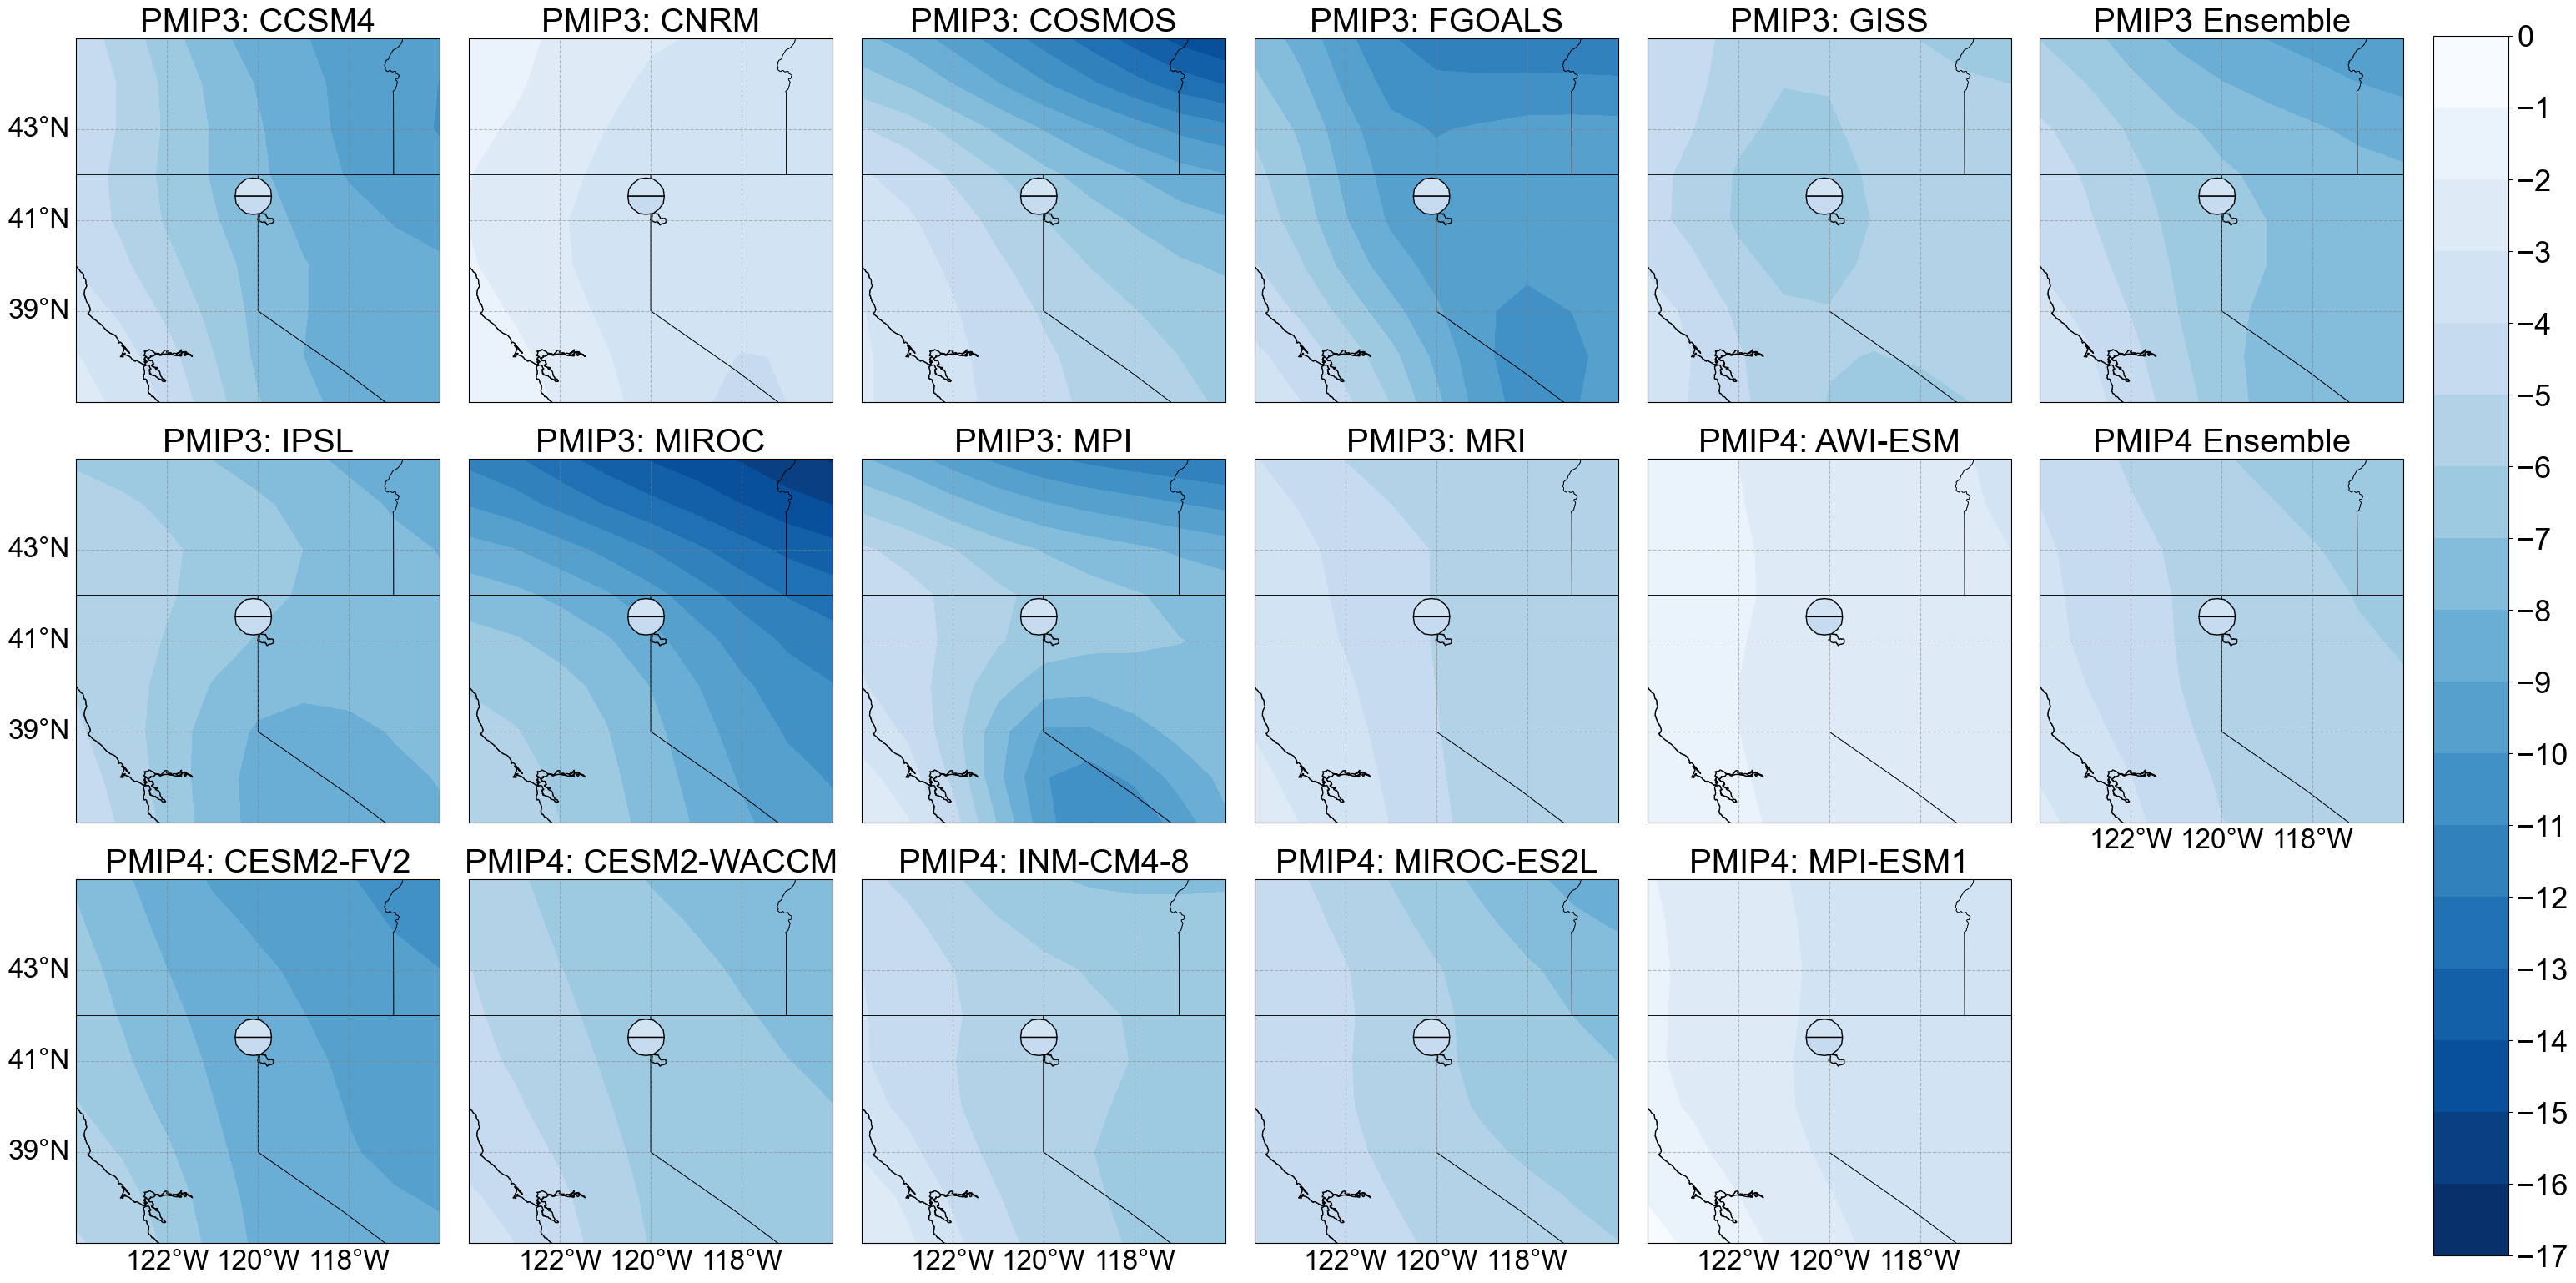

In [61]:
upper_lat = 45
lower_lat = 37
left_lon = -124  # Adjusted from 242
right_lon = -116  # Adjusted from 255

# Assuming datasets contains your model data
datasets = [CCSM4, CNRM, COSMOS, FGOALS, GISS, ensemble_mean, IPSL, MIROC, MPI, MRI,
            AWI_ESM,  ensemble_mean_pmip4, CESM2_FV2, CESM2_WACCM_FV2, INM_CM4_8, MIROC_ES2L, MPI_ESM1]

model_names = ["PMIP3: CCSM4", "PMIP3: CNRM", "PMIP3: COSMOS", "PMIP3: FGOALS", "PMIP3: GISS",  'PMIP3 Ensemble',  "PMIP3: IPSL", "PMIP3: MIROC", "PMIP3: MPI", "PMIP3: MRI",
               "PMIP4: AWI-ESM",  'PMIP4 Ensemble', "PMIP4: CESM2-FV2", 'PMIP4: CESM2-WACCM', "PMIP4: INM-CM4-8", "PMIP4: MIROC-ES2L", "PMIP4: MPI-ESM1"]

# Apply Gaussian smoothing and store smoothed data
sigma = 1  # Standard deviation for Gaussian kernel
smoothed_datasets = [
    xr.DataArray(gaussian_filter(dataset, sigma=sigma), dims=dataset.dims, coords=dataset.coords)
    for dataset in datasets
]

# Round data_min and data_max to nearest whole numbers
data_min = -17
data_max = 0

# Define the levels for the colorbar as whole numbers
levels = np.arange(data_min, data_max + 1, step=1)

# Create a BoundaryNorm object with specified levels
norm = mcolors.BoundaryNorm(boundaries=levels, ncolors=256)

# Create a ScalarMappable object with the normalization and colormap
cmap = 'Blues_r'
sm = ScalarMappable(cmap=cmap, norm=norm)

# Set global font properties
plt.rcParams['font.size'] = 24
plt.rcParams['font.family'] = 'Arial'

# Creating a plot grid with a specific projection
fig, axs = plt.subplots(3, 6, figsize=(36, 25), subplot_kw={'projection': ccrs.PlateCarree()})
plt.subplots_adjust(wspace=0.08, hspace = -0.45)
axs = axs.flatten()

# Define the location and size of the pie scatter point
scatter_point_lon = -120.102744
scatter_point_lat = 41.524151
radius = 0.4  # Adjust as needed

# Define the extent (left_lon, right_lon, lower_lat, upper_lat)
extent = [left_lon, right_lon, lower_lat, upper_lat]

# Latitude and Longitude intervals
lat_interval = 2
lon_interval = 2


# When plotting each dataset based on model names
for i, (ax, (dataset, name)) in enumerate(zip(axs, zip(smoothed_datasets, model_names))):
    ax.set_extent(extent, crs=ccrs.PlateCarree())

    pcm = ax.contourf(
        dataset.lon, 
        dataset.lat, 
        dataset, 
        levels=levels, 
        cmap=cmap, 
        norm=norm,
        transform=ccrs.PlateCarree()
    )

    # Add features to each subplot
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS, linewidth=0.5)
    ax.add_feature(cfeature.STATES, linewidth=0.5)
    ax.set_title(name)

    # Overlay the watershed boundary
    target_watershed_projected = target_watershed.to_crs(ax.projection)
    target_watershed_projected.boundary.plot(ax=ax, color='k', linewidth=1)

    # Define the values for each wedge in the pie
    # These values should be within your data range
    wedge_values = [TF4[0], HS[0]]  # Replace with actual values

    # Define the location and size of the pie scatter point
    scatter_point_lon = -120.102744
    scatter_point_lat = 41.524151
    radius = 0.4  # Adjust as needed

    # Add the wedges to the scatter point
    start_angle = 0
    angles = [180, 180]  # Three equal segments of 120 degrees each

    current_start_angle = start_angle
    for value, angle in zip(wedge_values, angles):
        color = sm.to_rgba(value)  # Map the value to a color
        wedge = mpatches.Wedge(
            center=(scatter_point_lon, scatter_point_lat),
            r=radius,
            theta1=current_start_angle,
            theta2=current_start_angle + angle,
            facecolor=color,
            edgecolor='k',
            transform=ccrs.Geodetic(),
            zorder=10
        )
        ax.add_patch(wedge)
        current_start_angle += angle
   
    # Add gridlines with specific labels
    gl = ax.gridlines(draw_labels=True, linestyle='--', color='gray', alpha = 0.5)
    gl.right_labels = False
    gl.top_labels = False

    # Customize the gridline labels
    gl.xlocator = mticker.FixedLocator(np.arange(left_lon, right_lon + 1, lon_interval))
    gl.ylocator = mticker.FixedLocator(np.arange(lower_lat, upper_lat + 3, lat_interval))

    # Add latitude labels to the first axes (plot 0), second row first plot (plot 5), and third row first plot (plot 10)
    if i == 0 or i == 6 or i == 12:
        gl.left_labels = True
    else:
        gl.left_labels = False

    # Add longitude labels to the last row (plots 10 to 14)
    if i >= 11:
        gl.bottom_labels = True
    else:
        gl.bottom_labels = False


# Add a vertical colorbar to the right of the subplots
cbar_ax = fig.add_axes([0.91, 0.2, 0.025, 0.585])  # [left, bottom, width, height]

# cbar_ax = fig.add_axes([0.15, 0.94, 0.7, 0.03])  # [left, bottom, width, height]
cbar = fig.colorbar(sm, cax=cbar_ax, orientation='vertical', ticks=levels)
cbar.ax.tick_params(labelsize=26)  # Set the tick label size

axs[17].axis('off')

# plt.savefig('Santi_pmip.png', dpi = 300, bbox_inches = 'tight')
plt.show()


In [60]:
import pandas as pd

datasets = [CCSM4, CNRM, COSMOS, FGOALS, GISS, IPSL, MIROC, MPI, MRI, ensemble_mean,
                  AWI_ESM, CESM2_FV2, CESM2_WACCM_FV2, INM_CM4_8, MIROC_ES2L, MPI_ESM1, ensemble_mean_pmip4]

model_names = ["PMIP3: CCSM4", "PMIP3: CNRM", "PMIP3: COSMOS", "PMIP3: FGOALS", "PMIP3: GISS", "PMIP3: IPSL", "PMIP3: MIROC", "PMIP3: MPI", "PMIP3: MRI", 'PMIP3 Ensemble',
               "PMIP4: AWI-ESM", "PMIP4: CESM2-FV2", 'PMIP4: CESM2-WACCM', "PMIP4: INM-CM4-8", "PMIP4: MIROC-ES2L", "PMIP4: MPI-ESM1", 'PMIP4 Ensemble']

# Coordinates for the scatter point
scatter_point_lon =  -120.102744
scatter_point_lat = 41.524151

# Initialize an empty list to store the data values at the scatter point for each dataset
scatter_data = []

# Loop through each dataset and get the value at the scatter point
for dataset in datasets:
    value_at_point = dataset.sel(lat=scatter_point_lat, lon=scatter_point_lon, method='nearest').item()
    scatter_data.append(value_at_point)
    print(f"Value at ({scatter_point_lat}, {scatter_point_lon}) for this dataset: {value_at_point}")

pd.DataFrame({'model': model_names, 'm': scatter_data}).to_csv('lake_surprise_m.csv')

Value at (41.524151, -120.102744) for this dataset: -7.915252685546875
Value at (41.524151, -120.102744) for this dataset: -3.514617919921875
Value at (41.524151, -120.102744) for this dataset: -6.516021728515625
Value at (41.524151, -120.102744) for this dataset: -9.88336181640625
Value at (41.524151, -120.102744) for this dataset: -6.42926025390625
Value at (41.524151, -120.102744) for this dataset: -6.7662353515625
Value at (41.524151, -120.102744) for this dataset: -9.529876708984375
Value at (41.524151, -120.102744) for this dataset: -5.804168701171875
Value at (41.524151, -120.102744) for this dataset: -5.211090087890625
Value at (41.524151, -120.102744) for this dataset: -6.841098308563232
Value at (41.524151, -120.102744) for this dataset: -2.227874755859375
Value at (41.524151, -120.102744) for this dataset: -8.691925048828125
Value at (41.524151, -120.102744) for this dataset: -6.54034423828125
Value at (41.524151, -120.102744) for this dataset: -5.542724609375
Value at (41.5

Value at (41.524151, -120.102744) for PMIP3 dataset: -7.915252685546875
Value at (41.524151, -120.102744) for PMIP3 dataset: -3.514617919921875
Value at (41.524151, -120.102744) for PMIP3 dataset: -6.516021728515625
Value at (41.524151, -120.102744) for PMIP3 dataset: -9.88336181640625
Value at (41.524151, -120.102744) for PMIP3 dataset: -6.42926025390625
Value at (41.524151, -120.102744) for PMIP3 dataset: -6.7662353515625
Value at (41.524151, -120.102744) for PMIP3 dataset: -9.529876708984375
Value at (41.524151, -120.102744) for PMIP3 dataset: -5.804168701171875
Value at (41.524151, -120.102744) for PMIP3 dataset: -5.211090087890625
Value at (41.524151, -120.102744) for PMIP4 dataset: -2.227874755859375
Value at (41.524151, -120.102744) for PMIP4 dataset: -8.691925048828125
Value at (41.524151, -120.102744) for PMIP4 dataset: -6.54034423828125
Value at (41.524151, -120.102744) for PMIP4 dataset: -5.542724609375
Value at (41.524151, -120.102744) for PMIP4 dataset: -5.797271728515625


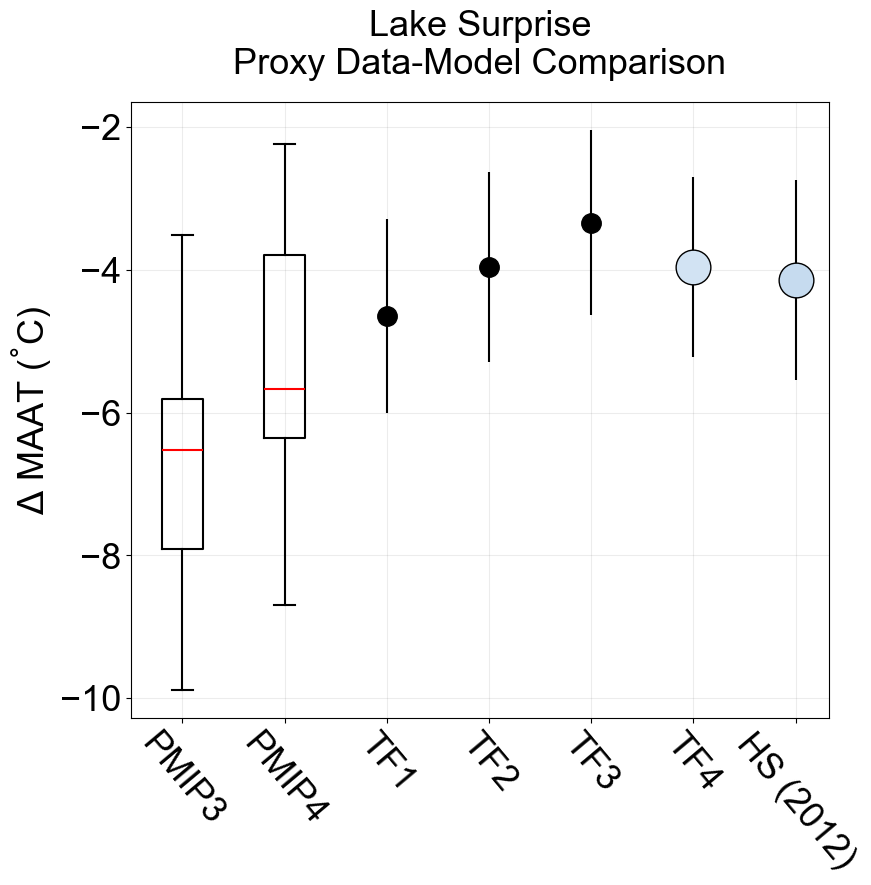

In [51]:
# Assuming datasets contain your model data
datasets_pmip3 = [CCSM4, CNRM, COSMOS, FGOALS, GISS, IPSL, MIROC, MPI, MRI]
datasets_pmip4 = [AWI_ESM, CESM2_FV2, CESM2_WACCM_FV2, INM_CM4_8, MIROC_ES2L, MPI_ESM1]

# Coordinates for the scatter point
scatter_point_lon = -120.102744
scatter_point_lat = 41.524151

# Initialize empty lists to store the data values at the scatter point for each dataset
scatter_data_pmip3 = []
scatter_data_pmip4 = []

# Loop through each PMIP3 dataset and get the value at the scatter point
for dataset in datasets_pmip3:
    value_at_point = dataset.sel(lat=scatter_point_lat, lon=scatter_point_lon, method='nearest').item()
    scatter_data_pmip3.append(value_at_point)
    print(f"Value at ({scatter_point_lat}, {scatter_point_lon}) for PMIP3 dataset: {value_at_point}")

# Loop through each PMIP4 dataset and get the value at the scatter point
for dataset in datasets_pmip4:
    value_at_point = dataset.sel(lat=scatter_point_lat, lon=scatter_point_lon, method='nearest').item()
    scatter_data_pmip4.append(value_at_point)
    print(f"Value at ({scatter_point_lat}, {scatter_point_lon}) for PMIP4 dataset: {value_at_point}")

# Create boxplot with scatter data
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 26  # Set the font size

# Colors
green = '#009988'
red = plt.cm.Dark2(1)

# Combine the PMIP3 and PMIP4 scatter data for plotting
scatter_data = [scatter_data_pmip3, scatter_data_pmip4]

# Create figure and axes
fig, ax = plt.subplots(figsize=(9, 8))

# Create boxplot with custom line widths for the box, whiskers, caps, and median
ax.boxplot(
    scatter_data, 
    widths=0.4, 
    boxprops=dict(linewidth=1.5, color='black'),
    whiskerprops=dict(linewidth=1.5, color='black'),
    capprops=dict(linewidth=1.5, color='black'),
    medianprops=dict(linewidth=1.5, color='red')
)

# Assuming `TF1`, `TF2`, `TF3`, `TF4`, `HS` are defined
ax.errorbar(3, TF1[0], yerr=TF1[1], fmt='o', ms=14, color='k', mec='k', ecolor='k', zorder=5)
ax.errorbar(4, TF2[0], yerr=TF2[1], fmt='o', ms=14, color='k', mec='k', ecolor='k', zorder=5)
ax.errorbar(5, TF3[0], yerr=TF3[1], fmt='o', ms=14, color='k', mec='k', ecolor='k', zorder=5)
ax.errorbar(6, TF4[0], yerr=TF4[1], fmt='o', ms=25,color='#d2e3f3', mec='k', ecolor='k', zorder=5)
ax.errorbar(7, HS[0], yerr=HS[1], fmt='o', ms=25, color='#c6dbef', mec='k', ecolor='k', zorder=5)

# Set titles and labels
ax.set_title('Lake Surprise\nProxy Data-Model Comparison', pad=20, fontsize=26)
ax.set_ylabel('Δ MAAT ($^\degree$C)')

# Set x-ticks positions and labels (fixed typo)
ax.set_xticks([1, 2, 3, 4, 5, 6, 7])
ax.set_xticklabels(['PMIP3', 'PMIP4', 'TF1', 'TF2', 'TF3', 'TF4', 'HS (2012)'], rotation=310)

# Optional: add grid lines for better readability
ax.grid(True, color='gray', alpha=0.15)

# Save and show the plot
# plt.savefig('Santi_PMIP_spread.png', dpi=300, bbox_inches='tight')
plt.show()


In [65]:
print(TF4, HS)

diff = TF4[0] - HS[0]
diff

diff_err = TF4[1] - HS[1]
diff_err

(-3.9564913453333315, 1.260793400997959) (-4.140810400000002, 1.3993712874001667)


-0.1385778864022078

In [22]:
import pandas as pd
model_names_pmip3 = ["PMIP3: CCSM4", "PMIP3: CNRM", "PMIP3: COSMOS", "PMIP3: FGOALS", "PMIP3: GISS", "PMIP3: IPSL", "PMIP3: MIROC", "PMIP3: MPI", "PMIP3: MRI"]
model_names_pmip4 = ["PMIP4: AWI-ESM", "PMIP4: CESM2-FV2", 'PMIP4: CESM2-WACCM', "PMIP4: INM-CM4-8", "PMIP4: MIROC-ES2L", "PMIP4: MPI-ESM1"]

pd.DataFrame({'model': model_names_pmip3, 'm':scatter_data_pmip3}).to_csv('lake_surprise_pmip3_m.csv')
pd.DataFrame({'model': model_names_pmip4, 'm':scatter_data_pmip4}).to_csv('lake_surprise_pmip4_m.csv')